# Inicialización

## Cargar las librerias

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st
from datetime import timedelta as td
from datetime import datetime

## Cargar los datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
data = pd.read_csv('/datasets/games.csv')

In [ ]:
# Imprimir la información general/resumen sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Imprime una muestra de los datos
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# Aqui podemos observar la cantidad de valores ausentes dentro del dataframe
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

- Tras analizar la informacion de los datos y los valores ausentes se tendra que emplear una manera de imputar los valores ausentes. De igual manera se observo que hay algunos duplicados dentro de los nombres de juegos para poder imputar alguno de los valores ausentes con los valores existentes duplicados.

## Analizar datos faltantes y arreglarlos

In [ ]:
# Se cambia a minusculas el nombre de las columnas para hacerlas mas manipulables
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [ ]:
# Aqui añadiremos una columna con la sumatoria de las ventas totales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
# Crear un diccionario que una a los juegos por nombre y calificacion, para poder imputar por los duplicados.
games_dict = {}
for name, group in data.groupby('name'):
    ratings = group['rating'].dropna().tolist()
    if ratings:
        games_dict[name] = ratings[0]
# Definimos una funcion que llene los valores ausentes.
def fill_dup_rating(row):
    name = row['name']
    rating = row['rating']
    if pd.isna(rating) and name in games_dict:
        return games_dict[name]
    else:
        return rating
# Ahora aplicamos la funcion.
data['rating'] = data.apply(fill_dup_rating, axis=1)

In [ ]:
# Aqui se imputa en la columna rating con 'RP' porque aun no tienen una clasificación.
data['rating'].fillna('RP', inplace=True)

In [ ]:
# Aqui se remplaza K-A por E debido a que K-A es otra manera de que sea para todo publico que se dejo de utilizar.
data['rating'] = data['rating'].replace('K-A', 'E')

In [ ]:
# Aqui se eliminan los datos ausentes de genre y name debido a que son 2 datos los que faltaban y no hay correlacion suficiente entre otras variables para poder imputarlo.
data['name'] = data['name'].fillna('not specified')
data['genre'] = data['genre'].fillna('not specified')

In [ ]:
# Comprobamos que no existan valores ausentes
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
total_sales           0
dtype: int64

- Debido a que no existe informacion suficiente para imputar critic score se opto por dejar los valores ausentes como estan, sucede lo mismo para la columna de user_score. De igual manera para la columan de year_of_release y rating se buscaron duplicados en los nombres para de esta manera se imputara sobre los juegos cuyos nombres fueran los mismos pero tuvieran el año o el rating faltante, el resto de datos se dejo como tal en valores ausentes.

## Corregir los tipos de datos

In [ ]:
# Aqui se cambiaran los datos de las columnas a los tipos de datos que les corresponden.
# data['year_of_release'] = data['year_of_release'].astype('int64')
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype(float)
# data['critic_score'] = data['critic_score'].astype('int64')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce').astype(float)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [ ]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


# Analisis de datos

## Comprobamos por año de salida

In [ ]:
# Agrupamos por plataforma y año.
año_y_plataforma = data.groupby(['platform', 'year_of_release']).agg({'year_of_release': ['count']}).reset_index()
año_y_plataforma.columns = ['plataforma', 'año', 'total_per_year']
año_y_plataforma.sort_values(by='total_per_year')

,plataforma,año,total_per_year
180,SAT,1999.0,1
49,GBA,2000.0,1
207,Wii,2016.0,1
181,SCD,1993.0,1
64,GEN,1990.0,1
...,...,...,...
32,DS,2010.0,323
200,Wii,2009.0,325
29,DS,2007.0,376
31,DS,2009.0,403


- Aqui podemos observar que se agruparon la cantidad de juegos por año y las plataformas con mas ventas.

<AxesSubplot:xlabel='platform'>

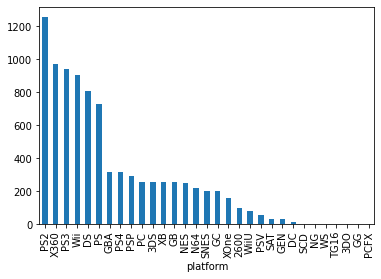

In [ ]:
# Aqui agrupamos por plataforma y ventas totales para identificar la plataforma con mas ventas por año.
total_sales_grouped = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',y='platform')
total_sales_grouped

- Podemos observar que PS2 y X360 son las plataformas con mas ventas.

In [ ]:
# Aqui dividimos el dataframe por las dos plataformas mas vendidas.
ps2 = data.query('platform == "PS2"')
x360 = data.query('platform == "X360"')
ps3 = data.query('platform == "PS3"')
wii = data.query('platform == "Wii"')
ds = data.query('platform == "DS"')

Text(0.5, 1.0, 'Ventas totales por año PS2')

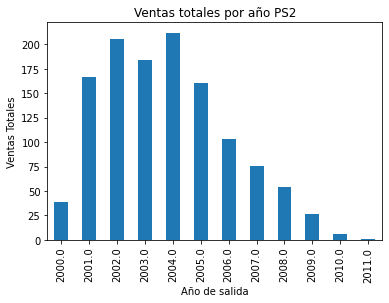

In [ ]:
ps2.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',y='total_sales')
plt.ylabel('Ventas Totales')
plt.xlabel('Año de salida')
plt.title('Ventas totales por año PS2')

- En este diagrama de barras podemos observar que para la plataforma 'PS2' tuvo la mayor cantidad de ventas el año 2004.

Text(0.5, 1.0, 'Ventas totales por año X360')

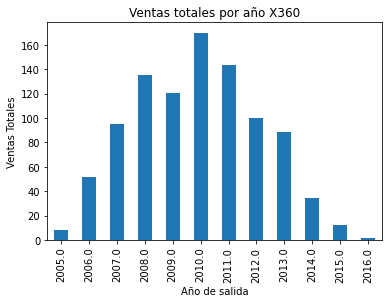

In [ ]:
x360.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',y='total_sales')
plt.ylabel('Ventas Totales')
plt.xlabel('Año de salida')
plt.title('Ventas totales por año X360')

- En este diagrama de barras podemos observar que para la plataforma 'X360' tuvo la mayor cantidad de ventas el año 2010.

Text(0.5, 1.0, 'Ventas totales por año PS3')

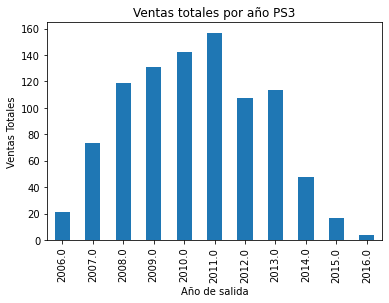

In [ ]:
ps3.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',y='total_sales')
plt.ylabel('Ventas Totales')
plt.xlabel('Año de salida')
plt.title('Ventas totales por año PS3')

- En este diagrama de barras podemos observar que para la plataforma 'PS3' tuvo la mayor cantidad de ventas el año 2011.

Text(0.5, 1.0, 'Ventas totales por año Wii')

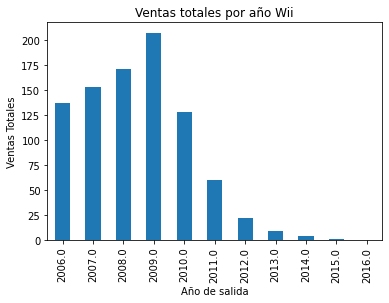

In [ ]:
wii.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',y='total_sales')
plt.ylabel('Ventas Totales')
plt.xlabel('Año de salida')
plt.title('Ventas totales por año Wii')

- En este diagrama de barras podemos observar que para la plataforma 'Wii' tuvo la mayor cantidad de ventas el año 2009.

Text(0.5, 1.0, 'Ventas totales por año DS')

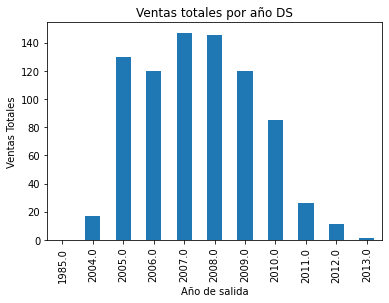

In [ ]:
ds.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',y='total_sales')
plt.ylabel('Ventas Totales')
plt.xlabel('Año de salida')
plt.title('Ventas totales por año DS')

- En este diagrama de barras podemos observar que para la plataforma 'DS' tuvo la mayor cantidad de ventas el año 2007.

Text(0.5, 0, 'Año de salida')

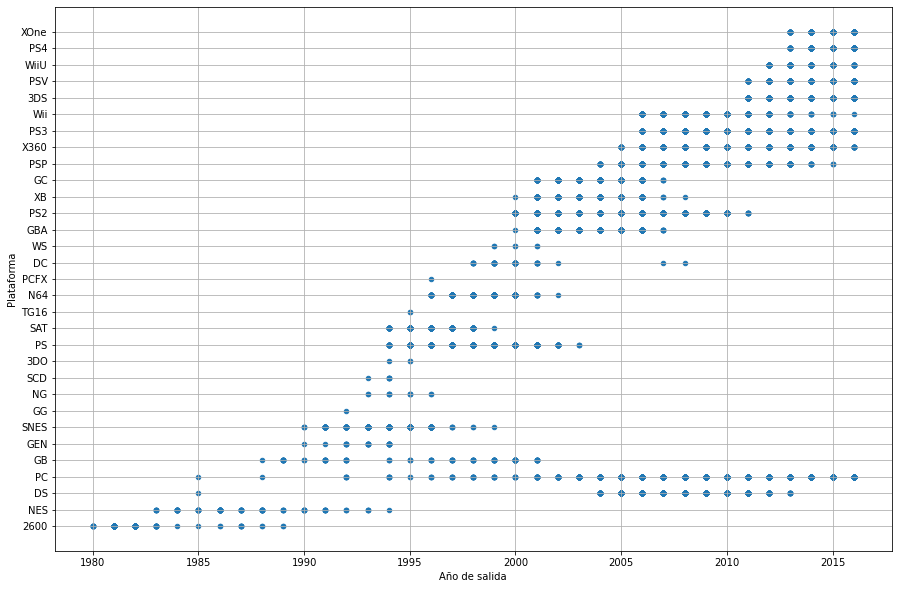

In [ ]:
# Con este grafico podemos observar las plataformas para ver cuanto tiempo sacan juegos para las diferentes plataformas
data.sort_values(by=['year_of_release', 'platform']).plot(kind='scatter', x='year_of_release', y='platform', figsize=(15,10), grid=True)
plt.ylabel('Plataforma')
plt.xlabel('Año de salida')

<AxesSubplot:xlabel='plataforma', ylabel='ventas_totales'>

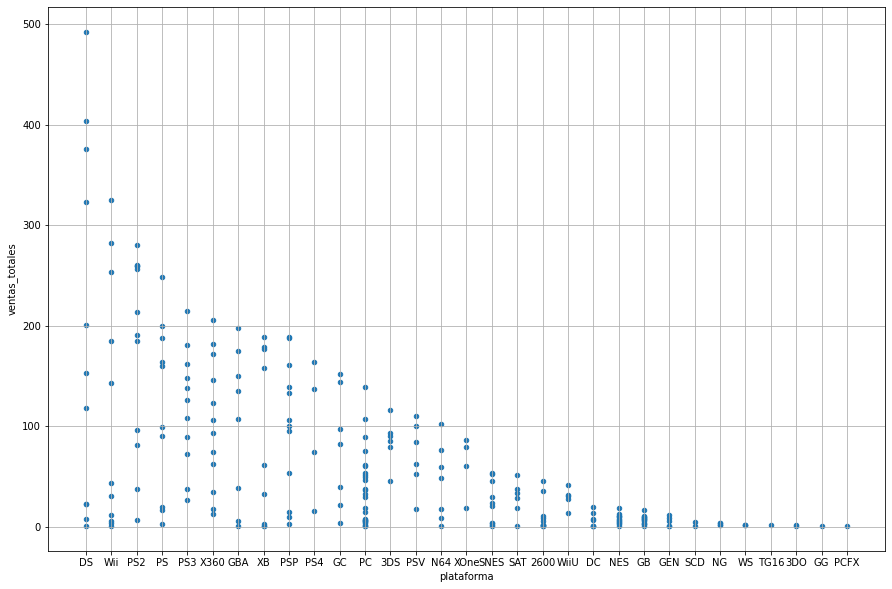

In [ ]:
# Agrupo por año, plataforma y el conteo de ventas por año, luego muestro un scatter plot para ver la dispersion del total de ventas.
grouped = data.groupby(['year_of_release', 'platform']).agg({'total_sales': ['count']}).reset_index()
grouped.columns = ['año', 'plataforma', 'ventas_totales']
grouped.sort_values(by='ventas_totales', ascending=False).plot(kind='scatter', x='plataforma', y='ventas_totales', figsize=(15,10), grid=True)

In [ ]:
# Aqui creamos una pivot_table para observar el tiempo promedio que dura una plataforma siendo popular
avg_platform = data.pivot_table(index='platform', values='year_of_release', aggfunc=('max', 'min'))
avg_platform.columns = ['max_duration', 'min_duration']
avg_platform['avg_time_platform'] = avg_platform['max_duration'] - avg_platform['min_duration']
avg_platform.sort_values(by='avg_time_platform', ascending=False)

,max_duration,min_duration,avg_time_platform
platform,,,
PC,2016.0,1985.0,31.0
DS,2013.0,1985.0,28.0
GB,2001.0,1988.0,13.0
X360,2016.0,2005.0,11.0
PSP,2015.0,2004.0,11.0
PS2,2011.0,2000.0,11.0
NES,1994.0,1983.0,11.0
DC,2008.0,1998.0,10.0
Wii,2016.0,2006.0,10.0


- En esta tabla hicimos sobre la columna de cuanto tiempo duran las plataformas desde su salida hasta el ultimo juego que sacaron, es decir, cuanto tiempo fueron populares y/o cuanto tiempo tardaron en desaparecer aproximadamente. Podemos observar que encabezando la lista con 31 años está PC e inmediatamente debajo esta DS con 28 años.

In [ ]:
# Separamos por los 3 años mas relevantes
data_limpio = data.query('year_of_release >= 2013')

In [ ]:
# Agrupamos por plataforma y ventas totales, luego ordenamos de mayor a menor.
data_limpio.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

## Boxplots y analisis

In [ ]:
good_data_limpio = data_limpio.query('platform == "PS4" or platform == "PS3" or platform == "XOne" or platform == "3DS" or platform == "X360"')

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

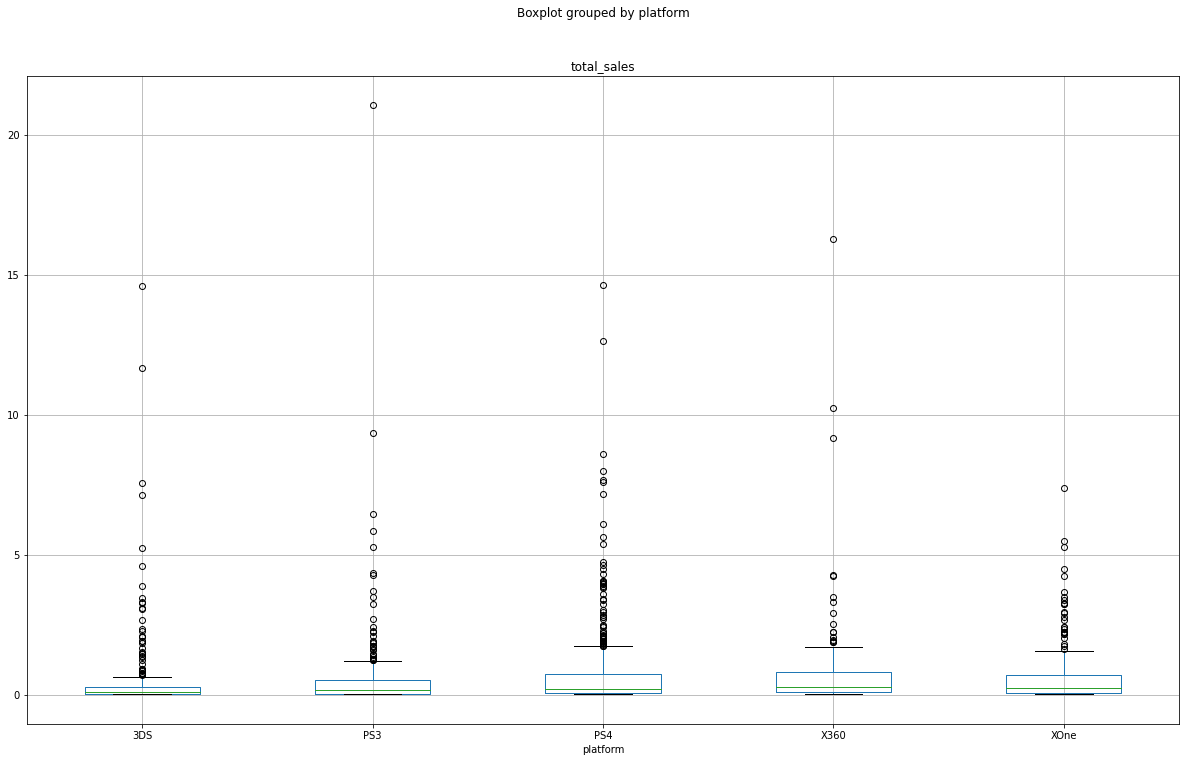

In [ ]:
# Aqui se crea un diagrama de caja para las ventas globales de los juegos por plataforma.
good_data_limpio.boxplot(by='platform', column='total_sales', figsize=(20,12))

- Como podemos observar en estos diagramas de caja vemos que existen muchos datos atipicos que pudieramos eliminar para tener una nocion mas clara de las medias y medianas de cada plataforma por juegos.

In [ ]:
filtered_data = good_data_limpio.copy()
def remove_outliers(filtered_data, nombre_col):
    q1 = filtered_data[nombre_col].quantile(0.25)
    q3 = filtered_data[nombre_col].quantile(0.75)
    iqr = q3 - q1
    lower = int(q1 - (1.5*iqr))
    upper = int(q3 + (1.5*iqr))
    return data.query(f'@lower <= {nombre_col} <= @upper')
good_data = remove_outliers(filtered_data, 'total_sales')

In [ ]:
datos_limpios = good_data.merge(good_data_limpio)
datos_limpios

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Just Dance 2014,X360,2013.0,Misc,0.72,0.17,0.00,0.10,79.0,7.8,E10+,0.99
1,Final Fantasy Type-0,PS4,2015.0,Role-Playing,0.37,0.32,0.15,0.14,NaN,NaN,RP,0.98
2,Dead Space 3,X360,2013.0,Action,0.64,0.26,0.00,0.08,78.0,6.4,M,0.98
3,Rocksmith 2014,PS3,2013.0,Misc,0.53,0.24,0.05,0.16,NaN,NaN,RP,0.98
4,Tom Clancy's Splinter Cell: Blacklist,X360,2013.0,Action,0.57,0.32,0.01,0.08,82.0,7.5,M,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
1240,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
1241,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1242,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

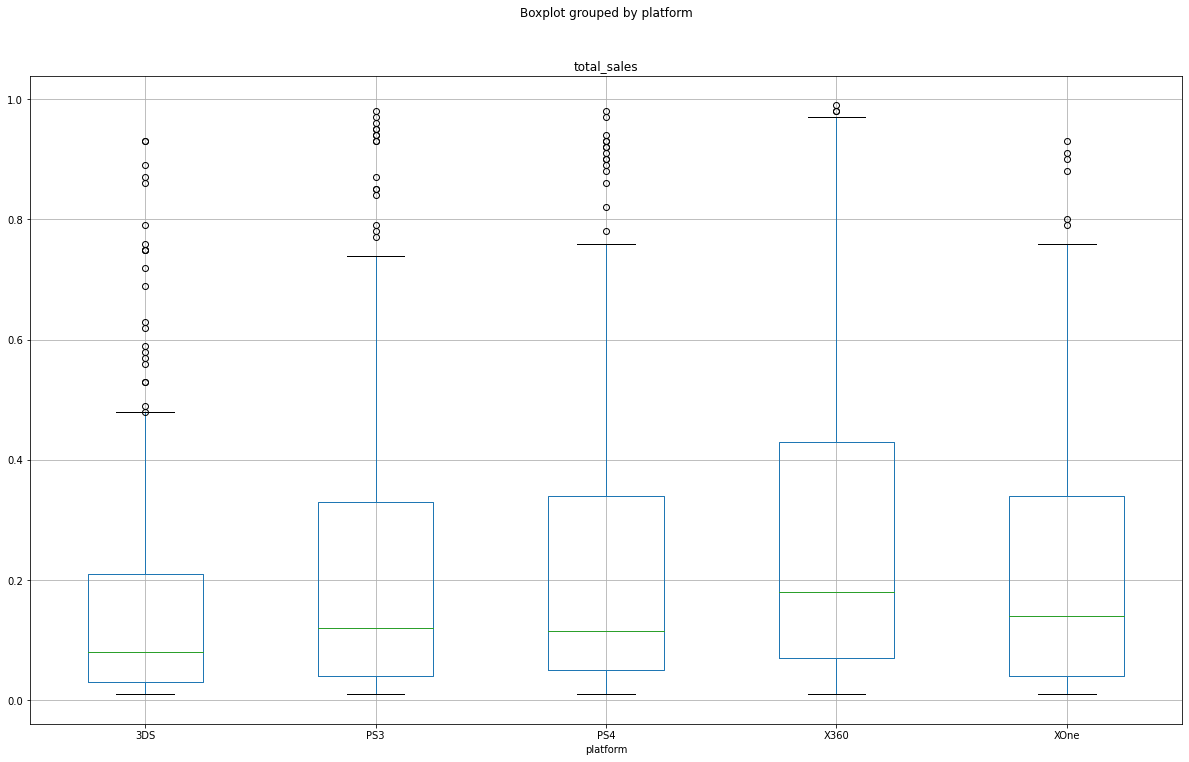

In [ ]:
datos_limpios.boxplot(by='platform', column='total_sales', figsize=(20,12))

- Aqui realizamos un boxplot con los datos sin datos atipicos para observar mejor los cuartiles de las plataformas y sus juegos con respecto a ventas totales.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

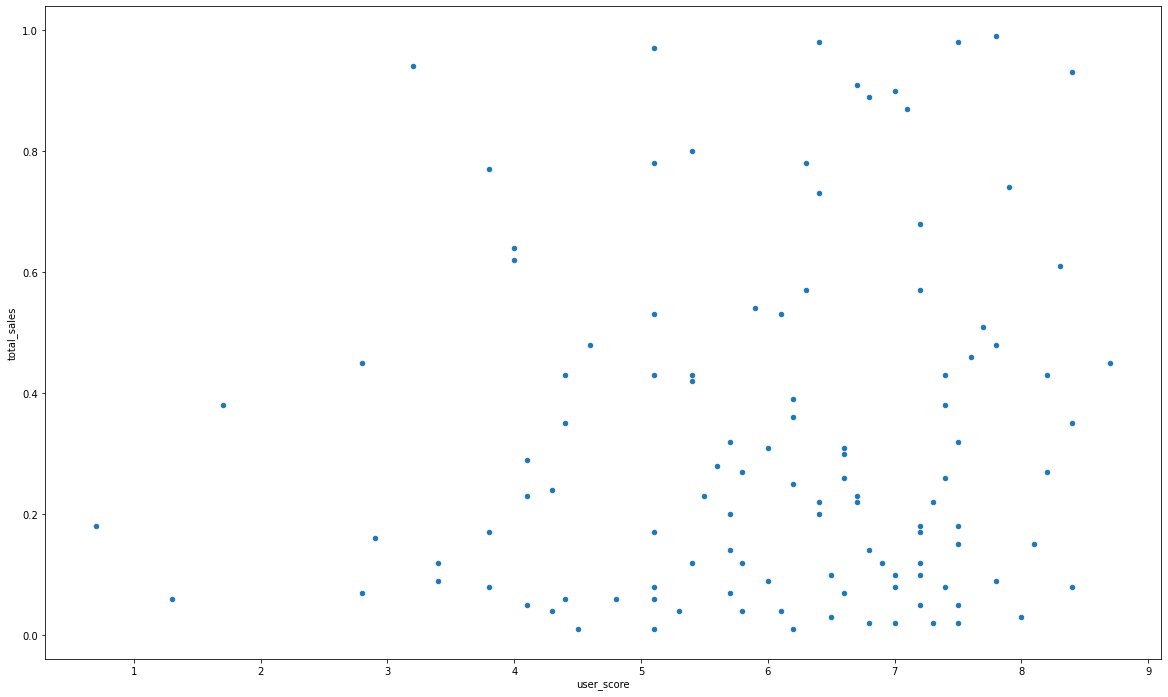

In [ ]:
# Aqui observamos un diagrama de dispersion con respecto a la plataforma X360 y user_score
good_data_x360 = datos_limpios.query('platform == "X360"').sort_values(by='user_score')
good_data_x360.plot(kind='scatter', y='total_sales', x='user_score', figsize=(20,12))

- Segun este grafico de dispersion observamos que para la plataforma x360 observamos que tras eliminar valores atipicos los datos no se conglomeran lo cual nos indica que la mayoria de ventas no tienen relacion con la calificacion de los usuarios.

In [ ]:
good_data_x360['total_sales'].corr(good_data_x360['user_score'])

0.10209052181585158

- Aqui calculamos el factor de correlacion entre las ventas totales y las criticas de los usuarios y observamos que no existe correlacion entre ambos.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

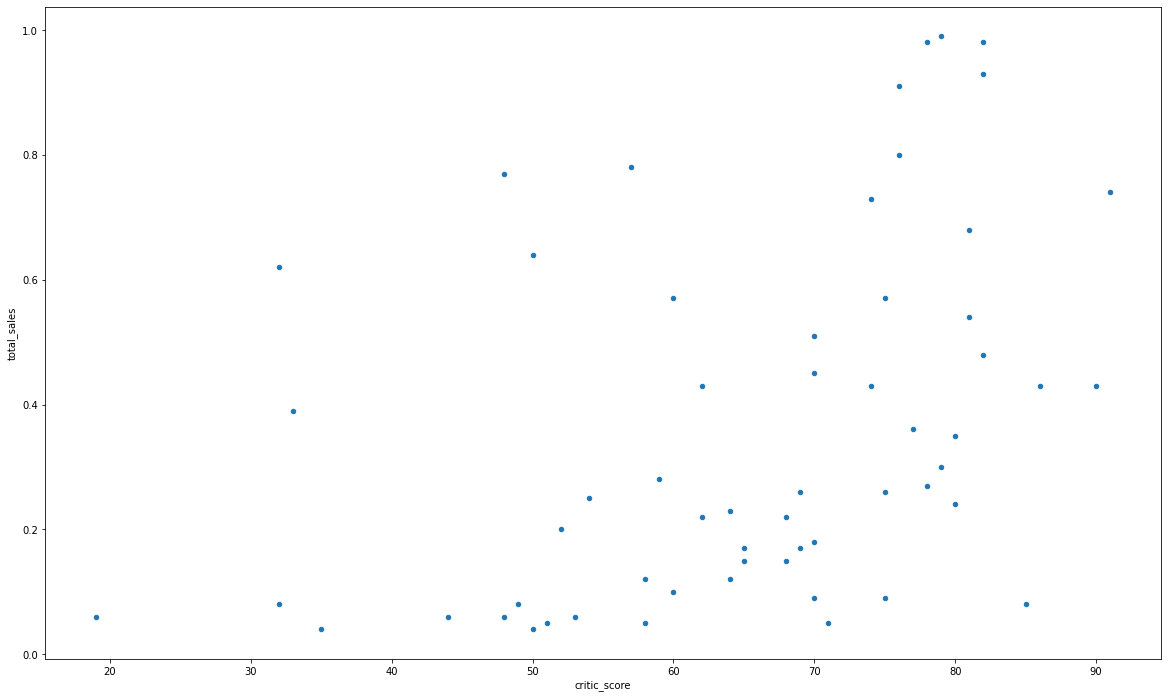

In [ ]:
# Aqui observamos un diagrama de dispersion con respecto a la plataforma X360 y critic_score
good_data_x360_1 = datos_limpios.query('platform == "X360"').sort_values(by='critic_score')
good_data_x360_1.plot(kind='scatter', y='total_sales', x='critic_score', figsize=(20,12))

- Segun este grafico de dispersion observamos que para la plataforma x360 observamos que tras eliminar valores atipicos los datos no se conglomeran en ningun lugar, lo cual nos indica que la mayoria de ventas no tienen relacion con la calificacion de los criticos.

In [ ]:
good_data_x360['total_sales'].corr(good_data_x360['critic_score'])

0.3947978947637919

- Aqui calculamos el factor de correlacion entre las ventas totales y las criticas de los criticos, valga la redundancia, y observamos que no existe correlacion entre ambos.

## Comparar mismos juegos en otras plataformas

In [ ]:
lego_jw = datos_limpios.query('name == "LEGO Jurassic World"')
lego_jw_pivot = datos_limpios.pivot_table(values='total_sales', columns='platform')
total_sales = datos_limpios['total_sales']

<AxesSubplot:>

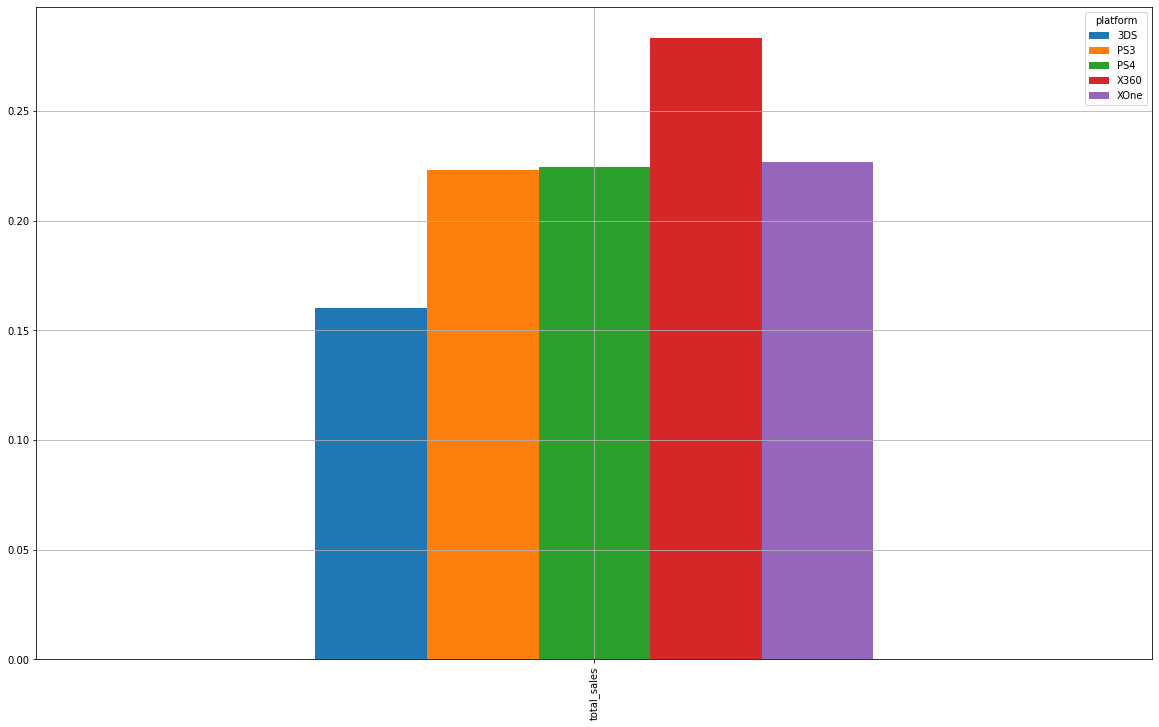

In [ ]:
lego_jw_pivot.plot(kind='bar', figsize=(20,12), grid=True)

<AxesSubplot:xlabel='genre'>

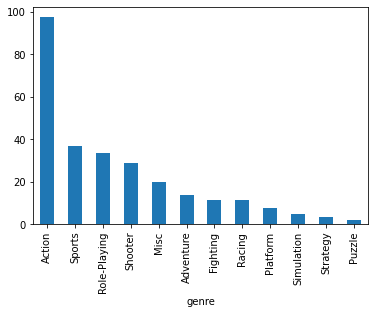

In [ ]:
generos = datos_limpios.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',y='genre')
generos

- El genero con mas ventas son los juegos de accion, se puede observar una tendencia con respecto a a que los juegos mas estrategicos o de resolver acertijos son menos atractivos que los de accion.

# Se crea un perfil de usuario para cada región

## Perfil NA

In [ ]:
# Aqui se revisan las cinco plataformas principales
na_data = datos_limpios.drop(columns=['eu_sales', 'jp_sales', 'other_sales'])

<AxesSubplot:xlabel='platform'>

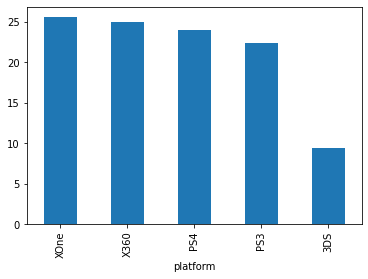

In [ ]:
na_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar',y='platform')

In [ ]:
# Aqui se calcula la varianza para las cuotas de mercado en NA.
np.var(na_data['na_sales'])

0.016702228768829937

<AxesSubplot:xlabel='genre'>

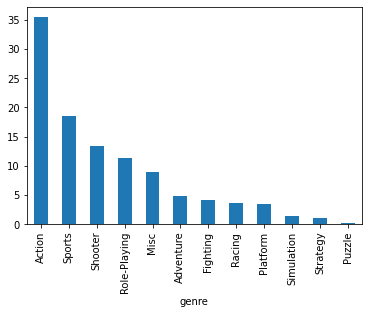

In [ ]:
# Aqui se agrupan los datos por ventas dependiendo del genero del juego para la region.
na_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar')

- Los 5 generos mas populares son action, sports, shooter, Role-playing y misc para la region de NA.

<AxesSubplot:xlabel='rating'>

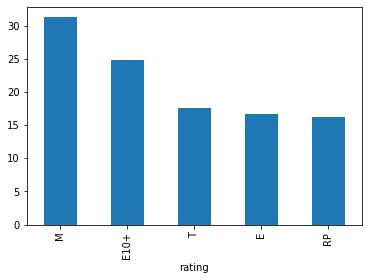

In [ ]:
# Aqui se agrupan los datos de ventas por calficiacion de ESRB.
na_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar')

- En este grafico de barras podemos osbervar que la calificacion mas popular es M que significa mature seguida por E10+ que significa Everybody above 10 years old.

## Perfil EU

In [ ]:
eu_data = datos_limpios.drop(columns=['na_sales', 'jp_sales', 'other_sales'])

<AxesSubplot:xlabel='platform'>

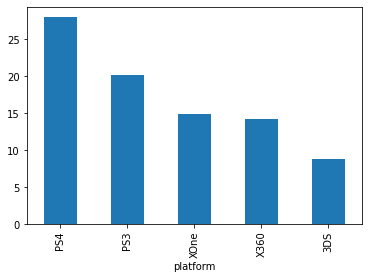

In [ ]:
eu_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar',y='platform')

In [ ]:
# Aqui se calcula la varianza para las cuotas de mercado en EU.
np.var(eu_data['eu_sales'])

0.009920023766813826

<AxesSubplot:xlabel='genre'>

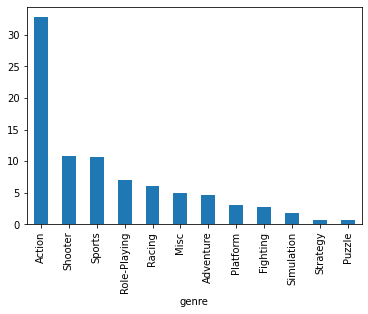

In [ ]:
# Aqui se agrupan los datos por ventas dependiendo del genero del juego para la region.
eu_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar')

- Los 5 generos mas populares son action, shooter, sports, role-playing y racing para la region de EU.

<AxesSubplot:xlabel='rating'>

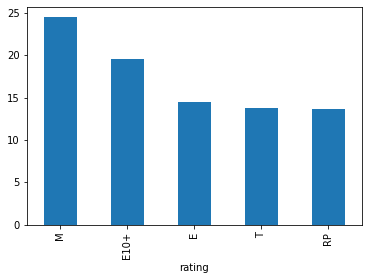

In [ ]:
# Aqui se agrupan los datos de ventas por calficiacion de ESRB.
eu_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar')

- En este grafico de barras podemos osbervar que la calificacion mas popular es E que significa everybody seguida por RP que significa rating pending.

## Perfil JP

In [ ]:
jp_data = datos_limpios.drop(columns=['eu_sales', 'na_sales', 'other_sales'])

<AxesSubplot:xlabel='platform'>

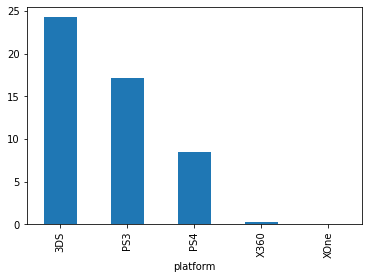

In [ ]:
jp_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar',y='platform')

In [ ]:
# Aqui se calcula la varianza para las cuotas de mercado en JP.
np.var(jp_data['jp_sales'])

0.007456144994365237

<AxesSubplot:xlabel='genre'>

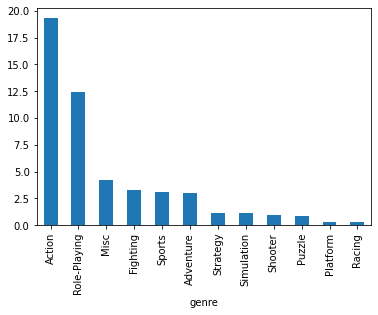

In [ ]:
# Aqui se agrupan los datos por ventas dependiendo del genero del juego para la region.
jp_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar')

- Los 5 generos mas populares son Action, Role-playing, fighting, sports y misc para la region de JP.

<AxesSubplot:xlabel='rating'>

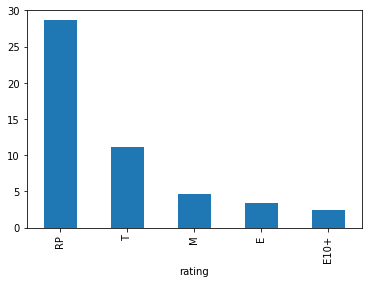

In [ ]:
# Aqui se agrupan los datos de ventas por calficiacion de ESRB.
jp_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar')

- En este grafico de barras podemos osbervar que la calificacion mas popular es RP que significa rating pending con la mayoria de datos, seguido están T que es teens solo para adolescentes.

## Conclusiones de la seccion

- Como podemos observar en esta seccion se comparo la varianza de las diferentes zonas de nuestra base de datos, todas se aproximan a cero lo que indica que las puntuaciones son casi iguales. De igual manera podemos observar en los generos mas populares de todas las regiones son action, sports y misc que se repiten en el top 5 entre todas las regiones. Asi como tambien prevalece la calificacion de E para las regiones de NA y EU siendo diferentes solo JP con la mayoria de sus clasificaciones en RP.

# Prueba las hipotesis

- H₀ = La media de calificaciones es igual para Xbox One y PC.
- H₁ = La media de calificaciones NO es igual para Xbox One y PC.

In [ ]:
consola_xone = data[data['platform']=='XOne']
calificacion_xone = consola_xone['user_score']
consola_pc = data[data['platform']=='PC']
calificacion_pc = consola_pc['user_score']

In [ ]:
# Realizamos prueba de levene para comprobar que las varianzas no son iguales.
calificacion_xone_sinna = calificacion_xone.dropna()
calificacion_pc_sinna = calificacion_pc.dropna()
st.levene(calificacion_xone_sinna, calificacion_pc_sinna, center='mean')

LeveneResult(statistic=3.166249609271464, pvalue=0.07549452472407711)

In [ ]:
# Prueba las hipótesis
alpha = 0.05
results = st.ttest_ind(calificacion_xone, calificacion_pc, equal_var=True, nan_policy='omit')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  1.3896435533548819e-05
Rechazamos la hipótesis nula


- Como podemos observar tras realizar un analisis estadistico de las calificaciones de los usuarios para ambas consolas y declarar nuestras hipotesis nos encontramos con que tenemos suficiente evidencia para rechazar la hipotesis nula, lo que quiere decir que aceptamos la hipotesis alternativa que en este caso implica que la media no es igual para ambos planes.

- H₀ = La media de calificaciones es igual para los generos de Accion y Deportes.
- H₁ = La media de calificaciones NO es igual para los generos de Accion y Deportes.

In [ ]:
genre_action = data[data['genre']=='Action']
calificacion_action = genre_action['user_score']
genre_sports = data[data['genre']=='Sports']
calificacion_sports = genre_sports['user_score']

In [ ]:
# Realizamos prueba de levene para comprobar que las varianzas no son iguales.
calificacion_action_sinna = calificacion_action.dropna()
calificacion_sports_sinna = calificacion_sports.dropna()
st.levene(calificacion_action_sinna, calificacion_sports_sinna, center='mean')

LeveneResult(statistic=20.782708914183328, pvalue=5.355232768512743e-06)

In [ ]:
# Prueba las hipótesis
alpha = 0.05
results = st.ttest_ind(calificacion_action, calificacion_sports, equal_var=False, nan_policy='omit')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.11483818791498648
No rechazamos la hipótesis nula


- El caso contrario al anterior analisis, aqui no rechazariamos la hipotesis nula pero esto no quiere decir que aceptamos la hipotesis nula sino que no existe suficiente evidencia para rechazarlo, dicho de otra manera esto requeriria un analisis mas profundo para poder rechazar o aceptar dichas hipotesis.

# Conclusiones generales
- Como conclusion general podemos observar que a la hora de analizar ambas hipotesis respecto a si la califiacion de los usuarios para las consolas y para los generos es igual para diferentes consolas asi como si es igual para diferentes generos no se puede rechazar la hipotesis nula lo cual nos da a entender que no tenemos evidencia suficiente para rechazar la hipotesis nula de si la media es igual para los dos generos, a su vez para el analisis estadistico de si las calificaciones para las distintas consolas diferentes se logro rechazar la hipotesis nula dando como resultado que la media no es igual para ambas consolas. A lo largo de este proyecto se analizo una base de datos las cuales se preprocesaron, se enriquecieron y se corrigieron los problemas que pudieran tener, tras tener las bases de datos procesadas se realizaron diferentes analisis estadisticos y graficos para poder encontrarnos con los motivos o problemas que pudieran tener dichas muestras poblacionales, de igual manera se realizaron analisis estadisticos de medias diferentes a ambas estipulando diferentes hipotesis nulas y alternativas para finalmente dar una conclusion respecto al estudio realizado, dicha conclusion esta escrita en este punto al inicio. Nos dimos cuenta tras realizar el analisis de las calificaciones de los usuarios se decidieron dejar como valores ausentes debido a que imputarlos sin conocimiento solo nos causaria problemas. Finalmente como conclusion personal tras el profundo analisis realizado puedo decir que la consola PS2 es la mas popular en torno a ventas, de igual manera el genero mas comprado es el genero de accion.